In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [5]:
train = pd.read_csv("train_add.csv")
test = pd.read_csv("test_add.csv")

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549 entries, 0 to 2548
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        2549 non-null   int64  
 1   총세대수        2549 non-null   int64  
 2   임대건물구분      2549 non-null   int64  
 3   지역          2549 non-null   int64  
 4   전용면적        2549 non-null   float64
 5   전용면적별세대수    2549 non-null   int64  
 6   공가수         2549 non-null   float64
 7   자격유형        2549 non-null   int64  
 8   임대보증금       2549 non-null   float64
 9   임대료         2549 non-null   float64
 10  지하철역수       2549 non-null   float64
 11  버스정류장수      2549 non-null   float64
 12  단지내주차면수     2549 non-null   float64
 13  공급유형        2549 non-null   object 
 14  등록차량수       2549 non-null   float64
 15  지역명         2549 non-null   object 
 16  cluster     2549 non-null   int64  
 17  0           2549 non-null   int64  
 18  1           2549 non-null   int64  
 19  2           2549 non-null  

In [3]:
train =train.drop('단지코드', axis=1)
test = test.drop('단지코드', axis=1)
test = test.drop('등록차량수', axis=1)

### 범주형 - 수치형으로 

In [ ]:
# def 리스트(col):
#     new_list = list(train[col].unique())
#     return new_list

# # 범주형데이터 수치형으로 전환
# list1_0 = 리스트('공급유형')
# list1_1 = 리스트('지역명')
# list1_2 = 리스트('자격유형2')
# list1_3 = 리스트('건물자격유형')

# for i in train.index:
#     train.공급유형[i] = list1_0.index(train.공급유형[i])
#     train.지역명[i] = list1_1.index(train.지역명[i])
#     train.자격유형2[i] = list1_2.index(train.자격유형2[i])
#     train.건물자격유형[i] = list1_3.index(train.건물자격유형[i])

### 범주형 - 수치형으로 

In [ ]:
# !pip install category_encoders

In [4]:
import category_encoders as ce

In [5]:
enc = ce.BinaryEncoder(cols=['공급유형','지역명','자격유형2','건물자격유형'])
numeric_train = enc.fit_transform(train)

In [6]:
numeric_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549 entries, 0 to 2548
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   총세대수        2549 non-null   int64  
 1   임대건물구분      2549 non-null   int64  
 2   지역          2549 non-null   int64  
 3   전용면적        2549 non-null   float64
 4   전용면적별세대수    2549 non-null   int64  
 5   공가수         2549 non-null   float64
 6   자격유형        2549 non-null   int64  
 7   임대보증금       2549 non-null   float64
 8   임대료         2549 non-null   float64
 9   지하철역수       2549 non-null   float64
 10  버스정류장수      2549 non-null   float64
 11  단지내주차면수     2549 non-null   float64
 12  공급유형_0      2549 non-null   int64  
 13  공급유형_1      2549 non-null   int64  
 14  공급유형_2      2549 non-null   int64  
 15  공급유형_3      2549 non-null   int64  
 16  등록차량수       2549 non-null   float64
 17  지역명_0       2549 non-null   int64  
 18  지역명_1       2549 non-null   int64  
 19  지역명_2       2549 non-null  

### 결측치처리

In [7]:
numeric_train.dropna(inplace=True)

In [ ]:
# numeric_train = pd.DataFrame(numeric_train)
# numeric_train.to_csv('C:/Users/서현/python/numeric_train.csv')

## 다중회귀

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
x_data = numeric_train.drop('등록차량수', axis=1).values
print(x_data.shape)
y_data = numeric_train['등록차량수'].values
print(y_data.shape)

(2522, 49)
(2522,)


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

In [14]:
mlr = LinearRegression()

mlr.fit(x_train, y_train)

print(mlr.score(x_train, y_train))

0.8184378519100428


In [15]:
y_predict = mlr.predict(x_test)

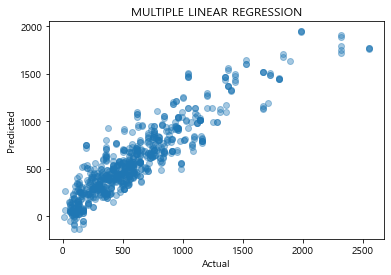

In [16]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

---

In [17]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras import optimizers

In [18]:
model = Sequential()

In [19]:
model.add(Dense(50, input_dim=50, activation='linear', name = 'Hidden1'))
model.add(Dense(100, activation = 'relu', name = 'Hidden2'))
model.add( Dense(50, activation = 'relu', name = 'Hidden3') )
model.add(Dense(1, activation = 'relu'))

In [20]:
sgd = optimizers.SGD(learning_rate = 0.00001) 

model.compile(loss='mse', optimizer=sgd, metrics=['mse'])

In [21]:
history = model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10


ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 50 but received input with shape (None, 49)


In [ ]:
print (model.predict(x_test))

In [ ]:
model.summary()

In [ ]:
# print(history.history) 
#plt.plot(history.history['accuracy']) 
plt.plot(history.history['loss']) 
plt.title('Train Loss') 
plt.ylabel('Loss') 
plt.savefig('tran_result.png')

## 랜덤포레스트

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold

In [23]:
modeling_data = numeric_train

In [24]:
x_data = modeling_data.drop('등록차량수', axis=1).values
print(x_data.shape)
y_data = modeling_data['등록차량수'].values
print(y_data.shape)

(2522, 49)
(2522,)


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

In [26]:
model = RandomForestRegressor(n_estimators = 200, max_features= 6, max_depth= 10)
model.fit(x_train, y_train)

predict = model.predict(x_test)

mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)

print("R-squared:", r2)
print("MSE:", mse)

R-squared: 0.951068413559943
MSE: 8796.115793872943


In [27]:
estimator = RandomForestRegressor()

param_grid = {
    "n_estimators":[30,40, 50],
     "max_depth":[10, 50, 100],
     "max_features":[6,8,10,12,14,16]
 }
#param_grid = {'n_estimators':[10,1,2,3,4,5,6,7,8,9], 'bootstrap':[True,False], 'criterion':['gini','entropy'], 'max_depth':[None,2,3,4,5,6], 'max_leaf_nodes':[None,2,3,4,5,6,7], 'min_samples_split':[2,3,4,5,6], 'min_samples_leaf':[1,2,3], 'max_features':[None,'sqrt','log2',5,6,7,8,9,10]}

cv_method = KFold(n_splits=4, shuffle=True)

grid = GridSearchCV(estimator, param_grid=param_grid, cv=cv_method) 
#grid = GridSearchCV(estimator, param_grid=param_grid, cv=3, scoring='accuracy') #디폴트로 cv=3, 분류에서 디폴트로 scoring='accuracy'

grid.fit(x_train, y_train)
predict2 = grid.predict(x_test)

mse = mean_squared_error(y_test, predict2)
r2 = r2_score(y_test, predict2)

print("R-squared:", r2)
print("MSE:", mse)
print("----------------------------------")
print("각 분할에서 얻은 정확도의 평균:")
print( grid.best_score_)  
print("best_params:")
print( grid.best_params_)

R-squared: 0.9858183317784331
MSE: 2549.347055812417
----------------------------------
각 분할에서 얻은 정확도의 평균:
0.9742959338450397
best_params:
{'max_depth': 100, 'max_features': 16, 'n_estimators': 40}


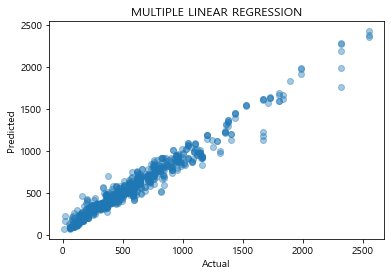

In [28]:
## 실제값과 예측값 시각화 
plt.scatter(y_test, predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [29]:
colnames = modeling_data.columns

In [30]:
def plot_feature_importance(model):
    n_features = x_train.shape[1]
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
    plt.yticks(np.arange(n_features), colnames)
    plt.xlabel("Random Forest Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

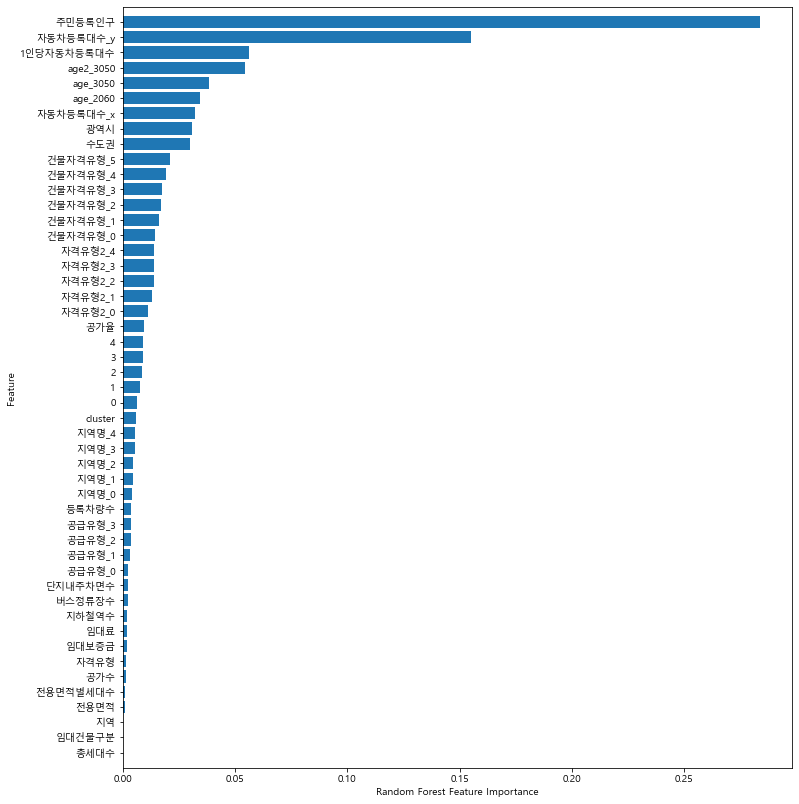

In [31]:
plt.figure(figsize=(12,14))    
plot_feature_importance(model)

## LGBM

In [32]:
import lightgbm as lgb
from lightgbm import plot_importance

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

In [ ]:
lgb = L

In [ ]:
train_dt = lgb.Dataset(x_train, label=y_train)
test_dt = lgb.Dataset(x_test, label=y_test)
params = {'learning_rate':0.01,
         'max_depth':16,
         'boosting':'gbdt',
         'metric':'mse',
         'is_training_metric':True,
         'num_leaves':144,
         'feature_fraction':0.9,
         'seed':2021}

In [ ]:
model = lgb.train(params, train_dt, 1000, test_dt, verbose_eval=100, early_stopping_rounds=100)
y_pred = model.predict(x_test)

## Pycaret

##### 연면적 결측치는 자동처리
- Numeric - mean, Categorical - constant => default

In [3]:
!pip install pycaret

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\seohyun\\anaconda3\\Lib\\site-packages\\~arkupsafe\\_speedups.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=d742fe9d79a07e0b97003bc66490c6c333e0520ef95617af0d2effc9b7c25838
  Stored in directory: c:\users\seohyun\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=83869da24201ba0d66744ddc8bf04aea10e41597ecaf3f3246d0d4f87cc08414
  Stored in directory: c:\users\seohyun\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created

In [8]:
import pycaret
from pycaret.regression import *

ModuleNotFoundError: No module named 'pycaret'

In [34]:
reg = setup(data = numeric_train,
               target = '등록차량수',
               train_size = 0.8,
               session_id = 123,
               fold_shuffle = True,
               normalize = True,
               transformation = True,
               transform_target = True,
               remove_multicollinearity = True,
               multicollinearity_threshold = 0.90
               #categorical_features =[]
               #numeric_features = []
               )

,Description,Value
0,session_id,123
1,Target,등록차량수
2,Original Data,"(2522, 50)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,35
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2017, 48)"


In [35]:
best = compare_models(sort = 'MSE')

In [ ]:
compare_models()